<a href="https://colab.research.google.com/github/theAkhileshRai/ML_Made_Easy/blob/master/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [179]:
test=pd.read_csv('/kaggle/test.csv')

In [180]:
train = pd.read_csv('/kaggle/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [182]:
train.columns[train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [183]:
test.columns[test.isnull().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [184]:
# train['Age']=train['Age'].fillna(train['Age'].mean())

In [185]:
grouped_df = train[['Pclass','Fare']]
grouped_df.groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [186]:
test.shape

(418, 11)

In [187]:
# train['Age']

In [188]:
test.columns[test.isnull().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [189]:
print(train['Embarked'].isna().any())
print(train['Cabin'].isna().any())


True
True


In [190]:
train['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [191]:
#  r'\b(?:Mr\.|Mrs\.)\b'


In [192]:
# Define regex pattern to match titles
#series = pd.series(train['Name'])
pattern = r'\b(Mr\. |Ms\. |Mrs\. |Miss\. |Mrs\. \(?|Master\. |Master |Don\. |Rev\. |Dr\. |Mme\. |Major\. |Lady\. |Jonkheer.\ )\b'

# Extract titles using regex
titles = pd.Series(train['Name']).str.extract(pattern, flags=re.IGNORECASE)

In [193]:
# pattern = r'\b(Mr\. |Ms\. |Mrs\. |Miss\. |Mrs\. \(?|Master\. |Master |Don\. |Rev\. |Dr\. |Mme\. |Major\. |Lady\. |Jonkheer.\ )\b'

# # Extract titles and remove periods and open parentheses using regex
# extracted_titles = [re.sub(r'[\[\(,\'\"?\)/\],\[\(\.]', '', re.match(pattern, title).group()) for title in titles if re.match(pattern, train['Name'])]

# print(extracted_titles)

In [194]:
titles

,0
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [195]:
#[re.match(pattern, title).group() for title in titles if re.match(pattern, titles)]


In [196]:
# extracted_titles = [re.sub(r'[\[\(,\'\"?\)/\],\[\(\.]', '', re.match(pattern, title).group()) for title in titles if re.match(pattern, titles)]


In [197]:
titles.iloc[15]


0    Mrs. (
Name: 15, dtype: object

In [198]:
train = pd.concat([train, titles], axis=1)

In [199]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


In [200]:
titles.isna()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [201]:
train=train.rename({0:'Title'}, axis=1)

In [202]:
train['Title'].isna().any()

True

In [203]:
train['Cabin'].isnull().sum()


687

In [204]:
test['Cabin'].isnull().sum()


327

In [205]:
count_nan = train['Title'].isnull().sum()

# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 9


In [206]:
train['Title'] = train['Title'].str.replace('\W', '', regex=True)


In [207]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [208]:
train['Title'] = train['Title'].fillna('')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [209]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title          False
dtype: bool

<BarContainer object of 12 artists>

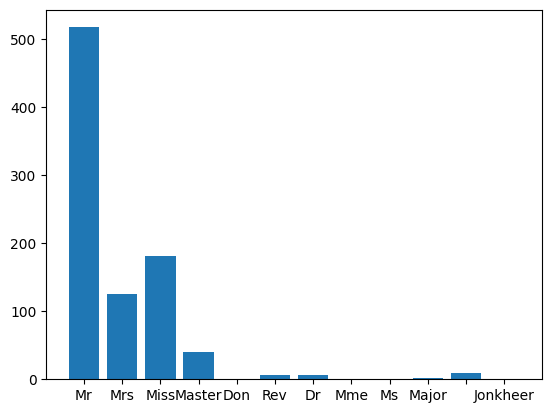

In [210]:
from collections import Counter

x = Counter(train['Title'])
plt.bar(x.keys(),x.values())

<Axes: xlabel='Sex', ylabel='count'>

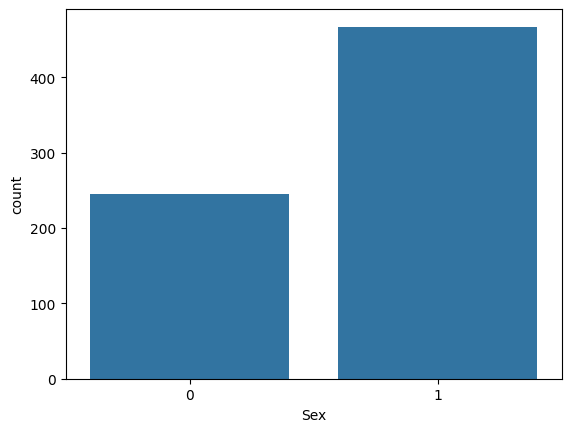

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the count plot
sns.countplot(x='Sex', data=train)


## Training the model
Lets train the model on the basis of multi logistic regression

In [212]:
train = train.drop(['Embarked','Cabin','Name','Ticket','PassengerId'],axis=1)

In [213]:
train.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Title       False
dtype: bool

In [ ]:
# Function to fill NaN with the most frequent value
def fill_most_frequent(series):
    most_frequent = series.mode().iloc[0]
    return series.fillna(most_frequent)

# Group by 'Sex' and apply the function to 'Age'
train['Age'] = train.groupby('Sex')['Age'].transform(fill_most_frequent)

print(train)

In [214]:
from sklearn import preprocessing
Title_encoder = preprocessing.LabelEncoder()
Sex_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train['Title']= Title_encoder.fit_transform(train['Title'])
train['Sex']= Title_encoder.fit_transform(train['Sex'])


In [215]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,1,22.0,1,0,7.2500,8
1,1,1,0,38.0,1,0,71.2833,9
2,1,3,0,26.0,0,0,7.9250,6
3,1,1,0,35.0,1,0,53.1000,9
4,0,3,1,35.0,0,0,8.0500,8
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,11
887,1,1,0,19.0,0,0,30.0000,6
888,0,3,0,NaN,1,2,23.4500,6
889,1,1,1,26.0,0,0,30.0000,8


In [216]:
from sklearn.model_selection import train_test_split

In [217]:
from sklearn.linear_model import LogisticRegression
train, val = train_test_split(train, test_size=0.2,random_state=42)

In [218]:
val

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
709,1,3,1,NaN,1,1,15.2458,5
439,0,2,1,31.0,0,0,10.5000,8
840,0,3,1,20.0,0,0,7.9250,8
720,1,2,0,6.0,0,1,33.0000,6
39,1,3,0,14.0,1,0,11.2417,6
...,...,...,...,...,...,...,...,...
433,0,3,1,17.0,0,0,7.1250,8
773,0,3,1,NaN,0,0,7.2250,8
25,1,3,0,38.0,1,5,31.3875,9
84,1,2,0,17.0,0,0,10.5000,6


In [219]:
train.to_csv('out.csv', index=False)